**Discrete Fourier Series Examples Notebook**

N. Stergioulas

Aristotle University of Thessaloniki

v1.0 (April 2020)

###### Content provided under a Creative Commons Attribution license, [CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/); code under [GNU GPLv3 License](https://choosealicense.com/licenses/gpl-3.0/). (c)2020 [Nikolaos Stergioulas](http://www.astro.auth.gr/~niksterg/)



In [1]:
import numpy as np
from scipy import fftpack 
import random
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import sys
import warnings
if not sys.warnoptions: warnings.simplefilter("ignore")

In [2]:
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.family'] = 'STIXGeneral'
mpl.rcParams['font.size'] = 18
mpl.rc('xtick', labelsize=16) ; mpl.rc('ytick', labelsize=16) 
plt.rcParams['figure.figsize']=8,5 ; plt.rcParams['legend.fontsize']=16

### From CFT to DFT
The continuous Fourier transform of a continuous function $h(t)$ is
$$\tilde h(f)=\int_{-\infty}^{\infty} h(t) e^{-i 2 \pi f t} d t$$
Consider now the set of $N+1$ discrete data points with values $h_n$ ($n=-N/2,..,N/2$, with $N$ being even), sampled at equally-spaced times $t_n = n\,\Delta t$, where $\Delta t$ is the *sampling interval*. The corresponding *sampling rate* is $1/\Delta t$ and the sampling times range from $t_{-N/2} = -(N/2)\Delta t$ to $t_{N/2} = (N/2)\Delta t$. 

Assume also that this set is *periodic*, with period $T=N\Delta t$, so that the values of the first and the last samples coincide, $h_{N/2} = h_{-N/2}$. There are thus only $N$ independent samples $h_{-N/2},..,h_{N/2-1}$. These $N$ independent samples determine at most $N$ independent transform values $H_k$. 

For a discrete signal of finite duration (and implied periodicity) $T$ and sampling interval $\Delta t$, the DFT frequency spectrum is also periodic with period  $1/\Delta t$ and frequency resolution is $\Delta f = 1/T$.  The discrete frequencies are thus $f_k = k/T = k/(N\Delta t)$, with $k=-N/2,..,N/2-1$) (centered at $f=0$).

Now, evaluate the Fourier transform integral (in the above time interval $-T/2 \leq t \leq. T/2$ only) for discrete frequency values $f_k$, using the discrete samples $h_{-N/2},..,h_{N/2}$ with the trapezoidal rule
$$
\begin{aligned}
\tilde h(f_k) &= \int_{0}^{T} h(t) e^{-i 2 \pi f_k t} d t \\
&\simeq\sum_{n=-N/2}^{N/2-1} \left( h_n e^{-i 2 \pi f_k t_n} + h_{n+1} e^{-i 2 \pi f_k t_{n+1}} \right)  \frac{\Delta t}{2} \\
& = \left(h_{-N/2} e^{-i 2 \pi f_k t_{-N/2}} + 2 h_{-N/2+1} e^{-i 2 \pi f_k t_{-N/2+1}} + ...+ 2 h_{N/2-1} e^{-i 2 \pi f_k t_{N/2-1}} + h_{N/2} e^{-i 2 \pi f_k t_{N/2}}  \right)   \frac{\Delta t}{2}\\
\end{aligned}
$$
Taking into account that $h_{-N/2} = h_{N/2}$ (because of the periodicity), we obtain
$$
\begin{aligned}
\tilde h(f_k) &\simeq \sum_{n=-N/2}^{N/2-1} h_n e^{-i 2 \pi f_k t_{n}} \Delta t \\
&= \Delta t\sum_{n=-N/2}^{N/2-1} h_n e^{-i (2 \pi k/N) n}  \\
& = \Delta t \,H_k 
\end{aligned}
$$
where we define 
$$H_k = \sum_{n=-N/2}^{N/2-1} h_n e^{-i (2 \pi k/N) n}$$
as the *Discrete Fourier Transform* (DFT).

Notice that because both the discrete signal and the DFT are periodic, this cyclical property allows us to relabel the sample points. For example, shifting the signal forward by half a period, we can relabel the samples as $n=0,..,N-1$. Then, the DFT becomes
$$\boxed{H_k = \sum_{n=0}^{N-1} h_n e^{-i (2 \pi k/N) n}}$$
with $k=0,..,N-1$, which is the definition used e.g. in Python or other implementations. In this order, the first half of the frequency values correspond to the zero and positive frequencies in the original order (half a period of this cycle) and the next half of the frequency values correspond to the negative frequencies in the original order (half a period of the next cycle).

In the examples that follow, we will first label the points as $n=0,..,N-1$, evaluate the DFT and the reorder the transform and the frequencies by shifting them by half a signal period backwards.

### Example 1: Single frequency with finite duration and integer number of cycles

We construct a sinusoidal signal with frequency $f_0$ and a total duration of $T$, fitting precisely $N_{\rm cycles}$ within this duration. In this way, the periodic extension of the discrete signal is precisely a sinusoidal signal with frequency $f_0$ and infinite duration. For such an arrangement, the DFT will have a nonzero magnitude only at that single frequency.

Let's have a look at the continuous signal in this time interval: 

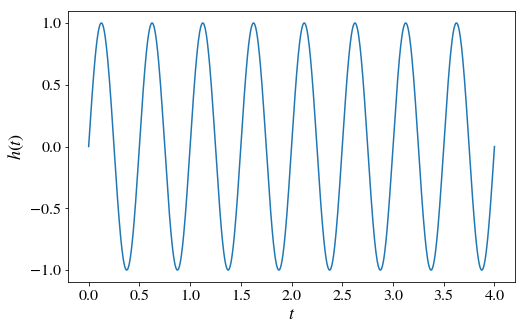

In [3]:
f0 = 2.0        # frequency of sinusoid
T0 = 1/f0       # period of sinusoid
Ncycles = 8     # number of cycles we choose within signal duration
T = Ncycles*T0  # total duration of the signal (periodicity of the signal)

t = np.linspace(0, T, 1000)
h = np.sin(2.0*np.pi*f0*t)

plt.plot(t, h)
plt.xlabel(r'$t$') ; plt.ylabel(r'$h(t)$')
plt.show()

We will now sample the signal using $N$ equidistant samples. The maximum frequency in the transform is (in absolute value) $f_{\rm max}=N/(2T) = 1/(2\Delta t)$. Thus, the samping rate must be at least twice the highest frequency present in the signal,  $1/\Delta t \geq 2 f_{\rm max} \Rightarrow \Delta t \leq 2/f_{\rm max}$, which is known as the *sampling theorem*. If we define $f_{\rm N}= f_{\rm s}/2$ as the *Nyquist frequency*, then the sampling theorem requires $f_{\rm N}\geq f_{\rm max}$ to avoid undersampling. 

In terms of the cycles in the present example, this translates to $N \geq 2 N_{\rm cycles}$.

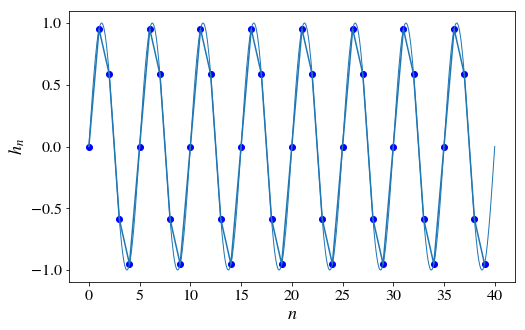

In [4]:
N = int(5*Ncycles)  
    
dt = T/N       # time resolution

t_n = np.linspace(0, (N-1)*dt, N)   # create the time samples
h_n = np.sin(2.0*np.pi*f0*t_n)      # create the signal samples

t = np.linspace(0, N, 500)
h = np.sin(2.0*np.pi*t*Ncycles/N) 

cmap = plt.get_cmap("tab10")
plt.plot(h_n, 'bo', h_n)
plt.plot(t, h, c='tab:blue', linewidth=1.0)

plt.xlabel(r'$n$') ; plt.ylabel(r'$h_n$')
plt.show()

Next, we evaluate the DFT:

In [5]:
H_k = fftpack.fft(h_n)

The spectrum that we obtain is ordered in the following way: element $n=0$ corresponds to frequency $f=0$, elements $n=1$ to $n=N/2-1$ correspond to the positive frequencies and the remaining elements to the negative frequencies (with $n=N/2$ to the most negative frequency and $n=N-1$ to the least negative frequency. 

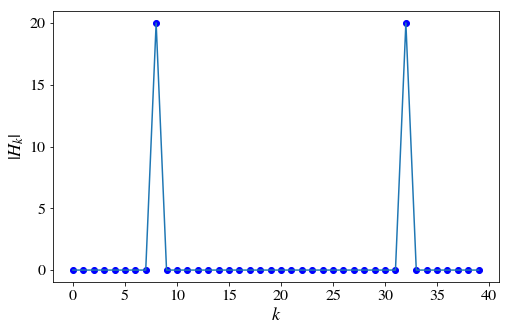

In [6]:
plt.plot(np.abs(H_k), 'bo', np.abs(H_k))
plt.xlabel(r'$k$') ; plt.ylabel(r'$|H_k|$')
plt.show()

However, we wish to display $|H(f_k)|$ as being symmetric around the central element (to which we want to assign the frequency $f=0$). To achieve this, we first have to re-order the elements of the DFT, by shifting them cyclically backwards by half a signal period $T$:

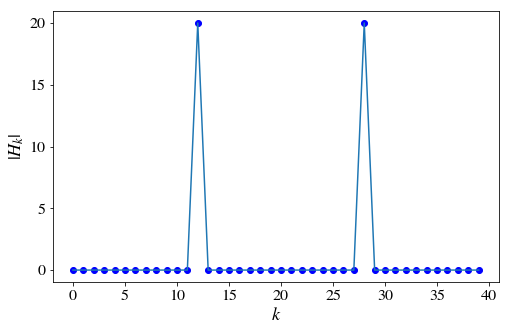

In [7]:
H_k_shift = fftpack.fftshift(H_k)

plt.plot(np.abs(H_k_shift), 'bo', np.abs(H_k_shift))
plt.xlabel(r'$k$') ; plt.ylabel(r'$|H_k|$')
plt.show()

Next, we want to assign frequency values to the index $k$. First, we assign values according to the initial order of the DFT, i.e. for $0\leq k \leq N/2-1$ we have the zero frequency and positive frequency half of the cycle in the original order and for  $N/2\leq k \leq N-1$ we have the negative frequencies of the next cycle in the original order.

In [8]:
f_k = fftpack.fftfreq(h_n.size, d = dt) 

In [9]:
display(f_k)

array([ 0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,  1.75,  2.  ,
        2.25,  2.5 ,  2.75,  3.  ,  3.25,  3.5 ,  3.75,  4.  ,  4.25,
        4.5 ,  4.75, -5.  , -4.75, -4.5 , -4.25, -4.  , -3.75, -3.5 ,
       -3.25, -3.  , -2.75, -2.5 , -2.25, -2.  , -1.75, -1.5 , -1.25,
       -1.  , -0.75, -0.5 , -0.25])

Then, we cyclically shift these frequencies backwards by half a signal period, so that they correspond to the original order: $f_k = k/T = k/(N\Delta t)$, with $k=-N/2,..,N/2-1$.

In [10]:
f_shift = fftpack.fftshift(f_k) 

In [11]:
display(f_shift)

array([-5.  , -4.75, -4.5 , -4.25, -4.  , -3.75, -3.5 , -3.25, -3.  ,
       -2.75, -2.5 , -2.25, -2.  , -1.75, -1.5 , -1.25, -1.  , -0.75,
       -0.5 , -0.25,  0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,
        1.75,  2.  ,  2.25,  2.5 ,  2.75,  3.  ,  3.25,  3.5 ,  3.75,
        4.  ,  4.25,  4.5 ,  4.75])

Below, we see a comparison of the frequency values as a function of the index $k$, before and after the re-ordering:

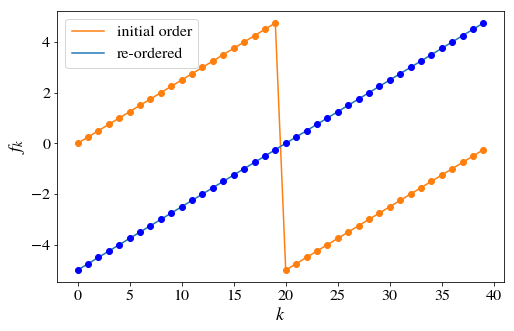

In [12]:
plt.plot(f_k,'-', c='tab:orange')
plt.plot(f_shift)
plt.plot(f_k, 'o', c='tab:orange',)
plt.plot(f_shift, 'bo')
plt.xlabel(r'$k$') ; plt.ylabel(r'$f_k$')
plt.legend(['initial order', 're-ordered'], loc='best')
plt.show()

As a function of frequency, the re-ordered DFT now looks expected:

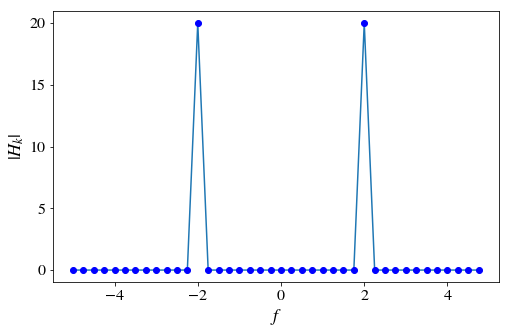

In [13]:
plt.plot(f_shift, np.abs(H_k_shift))
plt.plot(f_shift, np.abs(H_k_shift), 'bo')
plt.xlabel(r'$f$') ; plt.ylabel(r'$|H_k|$')
plt.show()

### Example 2: Spectral leakage due to a non-integer number of cycles

We construct the same sinusoidal signal as in the previous example, but this time we choose a non-integer number of cycles within the signal period: 

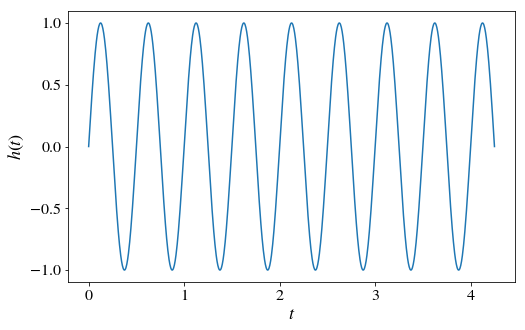

In [14]:
f0 = 2.0        # frequency of sinusoid
T0 = 1/f0       # period of sinusoid
Ncycles = 8.5   # number of cycles we choose within signal duration
T = Ncycles*T0  # total duration of the signal (periodicity of the signal)

t = np.linspace(0, T, 1000)
h = np.sin(2.0*np.pi*f0*t)

plt.plot(t, h)
plt.xlabel(r'$t$') ; plt.ylabel(r'$h(t)$')
plt.show()

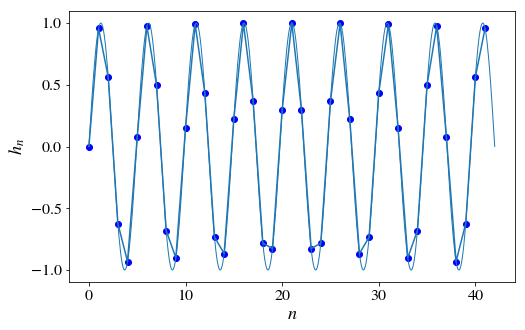

In [15]:
N = int(5*Ncycles)  # number of samples, must be >= 4*Ncycles, but otherwise does 
                    # not need to be integer multiple of Ncycles

dt = T/N       # time resolution

t_n = np.linspace(0, (N-1)*dt, N)   # create the time samples
h_n = np.sin(2.0*np.pi*f0*t_n)      # create the signal samples

t = np.linspace(0, N, 500)
h = np.sin(2.0*np.pi*t*Ncycles/N)

cmap = plt.get_cmap("tab10")
plt.plot(h_n, 'bo', h_n)
plt.plot(t, h, c='tab:blue', linewidth=1.0)
plt.xlabel(r'$n$') ; plt.ylabel(r'$h_n$')
plt.show()

In [16]:
H_k = fftpack.fft(h_n)
H_k_shift = fftpack.fftshift(H_k)
f_k = fftpack.fftfreq(h_n.size, d = dt) 
f_shift = fftpack.fftshift(f_k) 

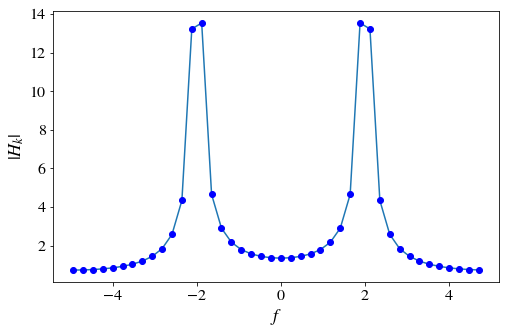

In [17]:
plt.plot(f_shift, np.abs(H_k_shift))
plt.plot(f_shift, np.abs(H_k_shift), 'bo')
plt.xlabel(r'$f$') ; plt.ylabel(r'$|H_k|$')
plt.show()

### Example 3: Spectral leakage due to zero-padding

We construct the same sinusoidal signal as in the previous examples, but this time we extend the original time interval with zero-padding.

In [18]:
f0 = 2.0        # frequency of sinusoid
T0 = 1/f0       # period of sinusoid
Ncycles = 8     # number of cycles we choose within signal duration
T = Ncycles*T0  # total duration of the signal (periodicity of the signal)

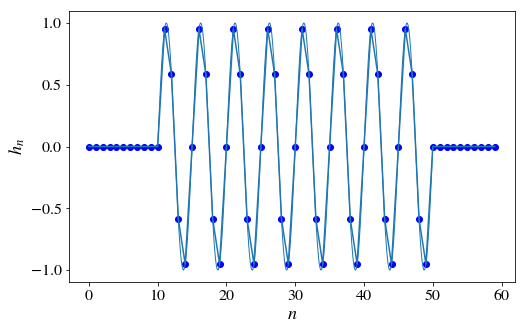

In [19]:
N = 5*Ncycles  # number of samples, must be >= 4*Ncycles, but otherwise does 
               # not need to be integer multiple of Ncycles
    
dt = T/N       # time resolution

n_pad = 10
t_n = np.linspace(0, (N+2*n_pad-1)*dt, N+2*n_pad)   # create the time samples
h_n = np.zeros(N+2*n_pad)

for i in range (n_pad, N+n_pad):
    h_n[i] = np.sin(2.0*np.pi*f0*t_n[i-n_pad])

t = np.linspace(n_pad, N+n_pad, 500)
h = np.sin(2.0*np.pi*t*Ncycles/N) 

cmap = plt.get_cmap("tab10")
plt.plot(h_n, 'bo', h_n)
plt.plot(t, h, c='tab:blue', linewidth=1.0)
plt.xlabel(r'$n$') ; plt.ylabel(r'$h_n$')
plt.show()

In [20]:
H_k = fftpack.fft(h_n)
H_k_shift = fftpack.fftshift(H_k)
f_k = fftpack.fftfreq(h_n.size, d = dt) 
f_shift = fftpack.fftshift(f_k) 

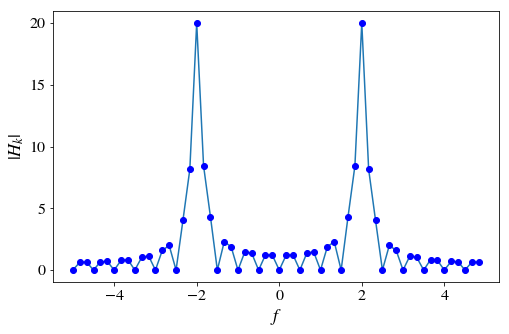

In [21]:
plt.plot(f_shift, np.abs(H_k_shift))
plt.plot(f_shift, np.abs(H_k_shift), 'bo')
plt.xlabel(r'$f$') ; plt.ylabel(r'$|H_k|$')
plt.show()

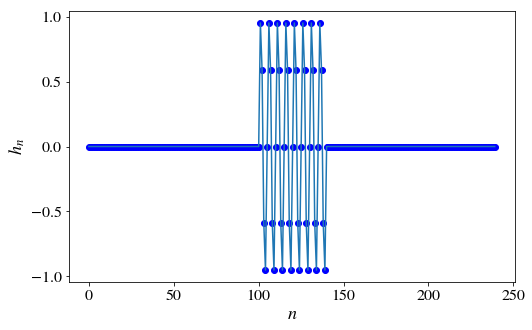

In [22]:
n_pad = 100
t_n = np.linspace(0, (N+2*n_pad-1)*dt, N+2*n_pad)   # create the time samples
h_n = np.zeros(N+2*n_pad)

for i in range (n_pad, N+n_pad):
    h_n[i] = np.sin(2.0*np.pi*f0*t_n[i-n_pad])

plt.plot(h_n, 'bo', h_n)
plt.xlabel(r'$n$') ; plt.ylabel(r'$h_n$')
plt.show()

In [23]:
H_k = fftpack.fft(h_n)
H_k_shift = fftpack.fftshift(H_k)
f_k = fftpack.fftfreq(h_n.size, d = dt) 
f_shift = fftpack.fftshift(f_k) 

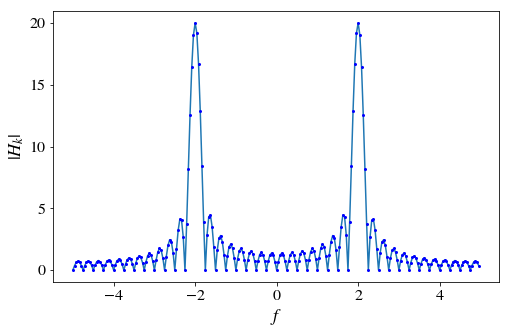

In [24]:
plt.plot(f_shift, np.abs(H_k_shift))
plt.plot(f_shift, np.abs(H_k_shift), 'bo', markersize=2)
plt.xlabel(r'$f$') ; plt.ylabel(r'$|H_k|$')
#plt.axis([1, 3, None, None])
plt.show()

The resolution of the main frequency improves over the non-integer cycles case without zero-padding, but as padding increases, the spectrum approaches the shape of the CFT when using the rectangular window on this signal, so it will never get better than this, no matter how much zero-padding is added.

### Example 4: Spectral leakage due to damping

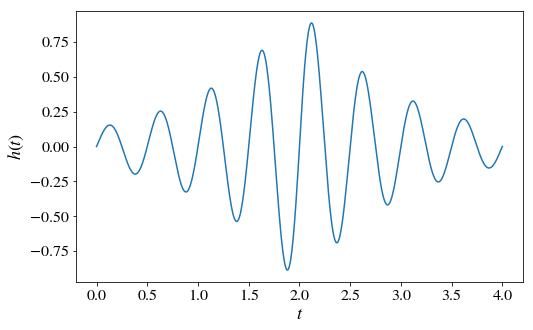

In [25]:
f0 = 2.0        # frequency of sinusoid
T0 = 1/f0       # period of sinusoid
Ncycles = 8     # number of cycles we choose within signal duration
T = Ncycles*T0  # total duration of the signal (periodicity of the signal)
timescale = 1 # damping timescale

t = np.linspace(0, T, 1000)
h = np.sin(2.0*np.pi*f0*t)*np.exp(-np.abs(t-T/2)/timescale)

plt.plot(t, h)
plt.xlabel(r'$t$') ; plt.ylabel(r'$h(t)$')
plt.show()

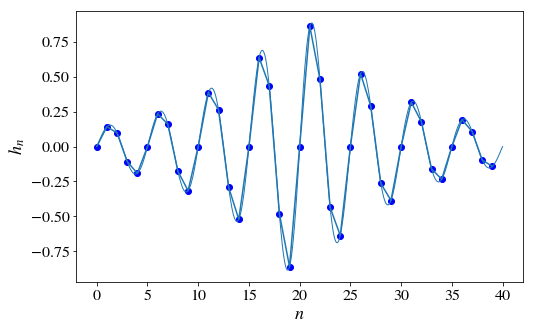

In [26]:
N = 5*Ncycles  # number of samples, must be >= 4*Ncycles, but otherwise does 
               # not need to be integer multiple of Ncycles
    
dt = T/N       # time resolution

t_n = np.linspace(0, (N-1)*dt, N)   # create the time samples
h_n = np.sin(2.0*np.pi*f0*t_n)*np.exp(-np.abs(t_n-T/2)/timescale) # create the signal samples

t = np.linspace(0, N, 500)
h = np.sin(2.0*np.pi*t*Ncycles/N)*np.exp(-np.abs(t*Ncycles/N/f0-T/2)/timescale)

cmap = plt.get_cmap("tab10")
plt.plot(h_n, 'bo', h_n)
plt.plot(t, h, c='tab:blue', linewidth=1.0)

#plt.plot(h_n, 'bo', h_n)
plt.xlabel(r'$n$') ; plt.ylabel(r'$h_n$')
plt.show()

In [27]:
H_k = fftpack.fft(h_n)
H_k_shift = fftpack.fftshift(H_k)
f_k = fftpack.fftfreq(h_n.size, d = dt) 
f_shift = fftpack.fftshift(f_k) 

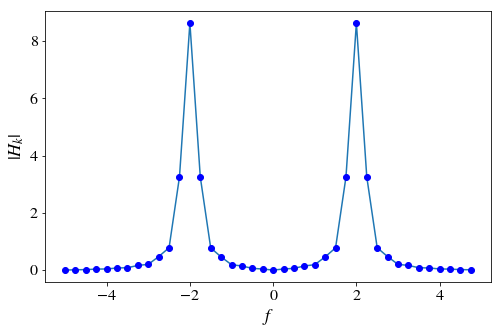

In [28]:
plt.plot(f_shift, np.abs(H_k_shift))
plt.plot(f_shift, np.abs(H_k_shift), 'bo')
plt.xlabel(r'$f$') ; plt.ylabel(r'$|H_k|$')
plt.show()

### Example 5: Scaling the DFT to match the CFT

When the DFT is multiplied by $\Delta t$, it becomes a good approximation to the CFT, since
$$ \tilde h(f_k) \simeq \Delta t H_k$$
We demonstrate this in the very simple case of the function $h(t) = e^{-t^2}$, whose CFT is $\tilde h(f)=\sqrt{\pi}e^{-\pi^2f^2}$. 

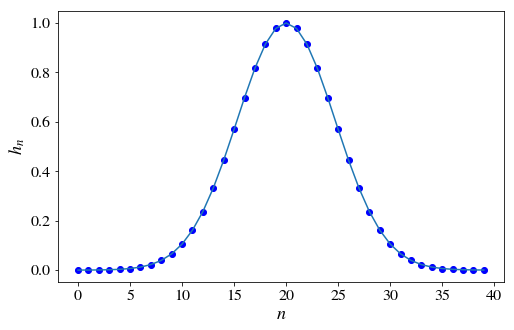

In [29]:
T=6
N=40

dt = T/N       # time resolution

t_n = np.linspace(0, (N-1)*dt, N)   # create the time samples
h_n = np.exp(-(t_n-T/2)**2)         # create the signal samples

plt.plot(h_n, 'bo', h_n)

plt.xlabel(r'$n$') ; plt.ylabel(r'$h_n$')
plt.show()

In [30]:
H_k = fftpack.fft(h_n)
H_k_shift = fftpack.fftshift(H_k)
f_k = fftpack.fftfreq(h_n.size, d = dt) 
f_shift = fftpack.fftshift(f_k) 

In [31]:
f = np.linspace(-N/(2*T), N/(2*T), 1000)
H = np.sqrt(np.pi)*np.exp(-(np.pi*f)**2)

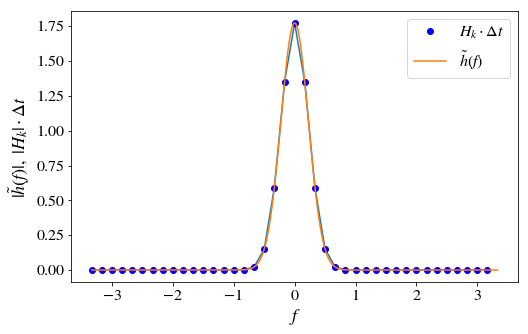

In [32]:
plt.plot(f_shift, np.abs(H_k_shift)*dt)
plt.plot(f_shift, np.abs(H_k_shift)*dt, 'bo')

plt.plot(f, np.abs(H))

plt.xlabel(r'$f$') ; plt.ylabel(r'$|\tilde h(f)|, \,\,|H_k| \cdot \Delta t $')
plt.legend(['_nolegend_', r'$H_k\cdot \Delta t$',  r'$\tilde h(f)$'], loc='best')
plt.show()

In the following examples, we will plot $\tilde h(f)\simeq |H_k| \cdot \Delta t $, instead of just $|H_k|$.

### Example 6: Aliasing due to undersampling

When the Nyquist frequency $f_{\rm N} =f_s/2$ is *less* than the maximum frequency $f_{\rm max}$ contained in a signal, then the signal is undersampled and the samples can mimic a signal of lower frequency. The frequency that appears in the spectrum due to this *aliasing* effect is $f_s - f_{\rm max}$. The aliasing can also be explained as a fold-over of a higher frequency from the next DFT cycle to the main DFT cycle.

In the following example, we have a single frequency, hence $f_{\rm max}=f_0$.

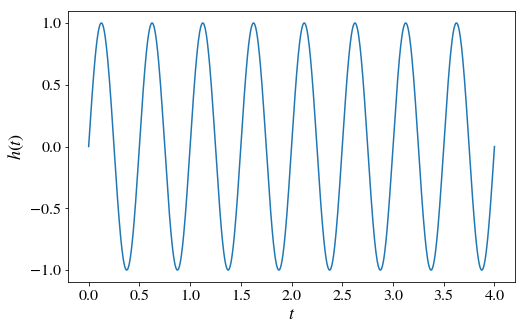

In [33]:
f0 = 2.0        # frequency of sinusoid
T0 = 1/f0       # period of sinusoid
Ncycles = 8     # number of cycles we choose within signal duration
T = Ncycles*T0  # total duration of the signal (periodicity of the signal)

t = np.linspace(0, T, 1000)
h = np.sin(2.0*np.pi*f0*t)

plt.plot(t, h)
plt.xlabel(r'$t$') ; plt.ylabel(r'$h(t)$')
plt.show()

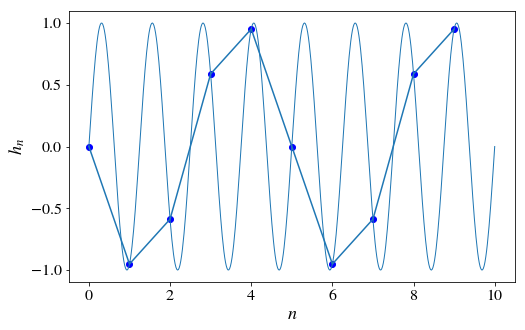

In [34]:
N = int(1.3*Ncycles)  # number of samples
    
dt = T/N              # time resolution

f_s = 1/dt            # sampling frequency

t_n = np.linspace(0, (N-1)*dt, N)   # create the time samples
h_n = np.sin(2.0*np.pi*f0*t_n)      # create the signal samples

t = np.linspace(0, N, 500)
h = np.sin(2.0*np.pi*t*Ncycles/N) 

cmap = plt.get_cmap("tab10")
plt.plot(h_n, 'bo', h_n)
plt.plot(t, h, c='tab:blue', linewidth=1.0)

plt.xlabel(r'$n$') ; plt.ylabel(r'$h_n$')
plt.show()

In [35]:
H_k = fftpack.fft(h_n)
H_k_shift = fftpack.fftshift(H_k)
f_k = fftpack.fftfreq(h_n.size, d = dt) 
f_shift = fftpack.fftshift(f_k) 

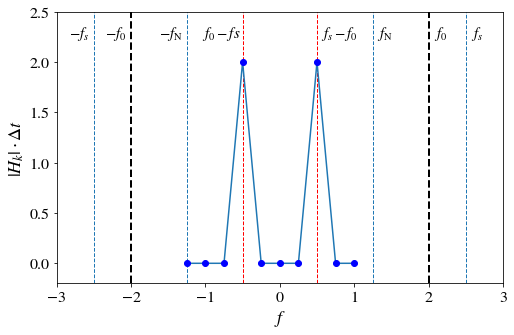

In [36]:
plt.plot(f_shift, np.abs(H_k_shift) * dt)
plt.plot(f_shift, np.abs(H_k_shift) * dt, 'bo')
plt.xlabel(r'$f$') ; plt.ylabel(r'$|H_k|\cdot \Delta t$')
ymax = 2.5
yl = ymax-0.25
plt.axis([-3, 3, -0.2, ymax])
plt.vlines(f0, -0.2, ymax, linestyles = '--', linewidth=2.0)
plt.vlines(-f0, -0.2, ymax, linestyles = '--', linewidth=2.0)
plt.vlines(-1/(2*dt), -0.2, ymax, linestyles = '--', linewidth=1.0, colors='tab:blue')
plt.vlines(1/(2*dt), -0.2, ymax, linestyles = '--', linewidth=1.0, colors='tab:blue')
plt.vlines(-1/dt, -0.2, ymax, linestyles = '--', linewidth=1.0, colors='tab:blue')
plt.vlines(1/dt, -0.2, ymax, linestyles = '--', linewidth=1.0, colors='tab:blue')
plt.vlines(f_s-f0, -0.2, ymax, linestyles = '--', linewidth=1.0, colors='r')
plt.vlines(-(f_s-f0), -0.2, ymax, linestyles = '--', linewidth=1.0, colors='r')
plt.text(f0+0.07, yl, r'$f_0$', fontsize=15)
plt.text(-f0-0.35, yl, r'$-f_0$', fontsize=15)
plt.text((f_s-f0)+0.05, yl, r'$f_s-f_0$', fontsize=15)
plt.text(-(f_s-f0)-0.55, yl, r'$f_0-fs$', fontsize=15)
plt.text(1/dt+0.07, yl, r'$f_s$', fontsize=15)
plt.text(-1/dt-0.33, yl, r'$-f_s$', fontsize=15)
plt.text(1/(2*dt)+0.06, yl, r'$f_{\rm N}$', fontsize=15)
plt.text(-1/(2*dt)-0.37, yl, r'$-f_{\rm N}$', fontsize=15)
plt.show()

In [37]:
display(f0, f_s, f_s - f0)

2.0

2.5

0.5

### Example 7: Aliasing due to undersampling with several frequencies

In the following example, we have a signal which contains a frequency at $f_0$ and an additional frequency (with smaller amplitude) at $3f_0$, hence $f_{\rm max}=3f_0$. We will use a sampling rate that is sufficient to obtain $f_0$, but not sufficient for obtaining $3f_0$ and therefore aliasing at a frequency $f_s-f_{\rm max}$ appears.

But first, let's see what the DFT looks like, when a sufficient sampling rate with $f_{\rm N}> f_{\rm max}$ is used:

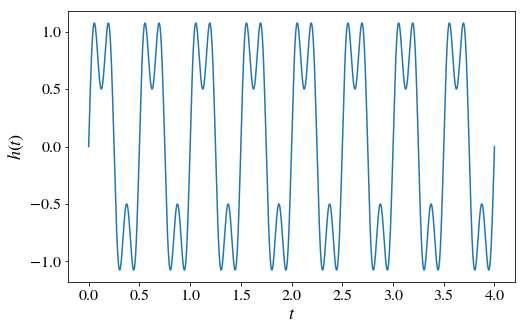

In [38]:
f0 = 2.0        # frequency of main sinusoid
T0 = 1/f0       # period of main sinusoid
Ncycles = 8     # number of cycles we choose within signal duration
T = Ncycles*T0  # total duration of the signal

fmax = 3*f0     # second sinusoid

t = np.linspace(0, T, 1000)
h = np.sin(2.0*np.pi*f0*t)+0.5*np.sin(2.0*np.pi*fmax*t)

plt.plot(t, h)
plt.xlabel(r'$t$') ; plt.ylabel(r'$h(t)$')
plt.show()

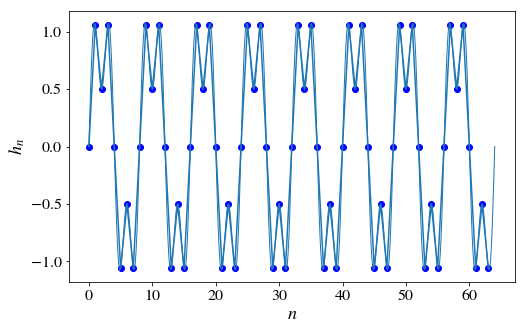

In [39]:
N = int(8*Ncycles)  # number of samples
    
dt = T/N            # time resolution

f_s = 1/dt          # sampling frequency

t_n = np.linspace(0, (N-1)*dt, N)   # create the time samples
h_n = np.sin(2.0*np.pi*f0*t_n)+0.5*np.sin(2.0*np.pi*fmax*t_n)  # create the signal samples

t = np.linspace(0, N, 500)
h = np.sin(2.0*np.pi*t*Ncycles/N)+0.5*np.sin(2.0*np.pi*t*(fmax/f0)*Ncycles/N) 

cmap = plt.get_cmap("tab10")
plt.plot(h_n, 'bo', h_n)
plt.plot(t, h, c='tab:blue', linewidth=1.0)

plt.xlabel(r'$n$') ; plt.ylabel(r'$h_n$')
plt.show()

In [40]:
H_k = fftpack.fft(h_n)
H_k_shift = fftpack.fftshift(H_k)
f_k = fftpack.fftfreq(h_n.size, d = dt) 
f_shift = fftpack.fftshift(f_k) 

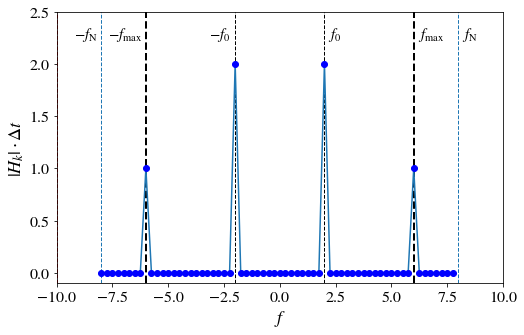

In [41]:
plt.plot(f_shift, np.abs(H_k_shift) *dt)
plt.plot(f_shift, np.abs(H_k_shift) *dt, 'bo')
plt.xlabel(r'$f$') ; plt.ylabel(r'$|H_k|\cdot \Delta t$')
ymax = 2.5
ymin = -0.1
yl = ymax-0.25
plt.axis([-10, 10, ymin, ymax])
plt.vlines(f0, ymin, ymax, linestyles = '--', linewidth=1.0)
plt.vlines(-f0, ymin, ymax, linestyles = '--', linewidth=1.0)
plt.vlines(fmax, ymin, ymax, linestyles = '--', linewidth=2.0)
plt.vlines(-fmax, ymin, ymax, linestyles = '--', linewidth=2.0)
plt.vlines(-1/(2*dt), ymin, ymax, linestyles = '--', linewidth=1.0, colors='tab:blue')
plt.vlines(1/(2*dt), ymin, ymax, linestyles = '--', linewidth=1.0, colors='tab:blue')
plt.vlines(-1/dt, ymin, ymax, linestyles = '--', linewidth=1.0, colors='tab:blue')
plt.vlines(1/dt, ymin, ymax, linestyles = '--', linewidth=1.0, colors='tab:blue')
plt.vlines(f_s-fmax, ymin, ymax, linestyles = '--', linewidth=1.0, colors='r')
plt.vlines(-(f_s-fmax), ymin, ymax, linestyles = '--', linewidth=1.0, colors='r')
plt.text(f0+0.15, yl, r'$f_0$', fontsize=15)
plt.text(-fmax-1.7, yl, r'$-f_{\rm max}$', fontsize=15)
plt.text(fmax+0.2, yl, r'$f_{\rm max}$', fontsize=15)
plt.text(-f0-1.15, yl, r'$-f_0$', fontsize=15)
plt.text(1/(2*dt)+0.15, yl, r'$f_{\rm N}$', fontsize=15)
plt.text(-1/(2*dt)-1.2, yl, r'$-f_{\rm N}$', fontsize=15)
plt.show()

In [42]:
display(f0, fmax, f_s, f_s/2)

2.0

6.0

16.0

8.0

Now, let's see what happens, when an insufficient sampling rate with $f_{\rm N}< f_{\rm max}$ is used:

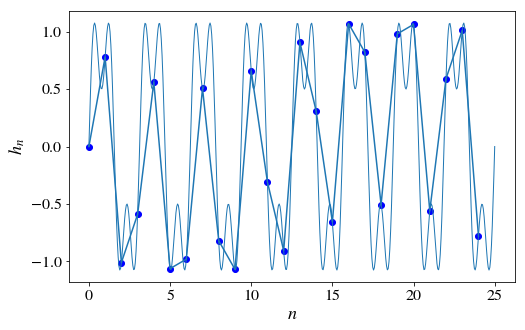

In [43]:
N = int(3.2*Ncycles)  # number of samples
    
dt = T/N       # time resolution

f_s = 1/dt            # sampling frequency

t_n = np.linspace(0, (N-1)*dt, N)   # create the time samples
h_n = np.sin(2.0*np.pi*f0*t_n)+0.5*np.sin(2.0*np.pi*fmax*t_n)      # create the signal samples

t = np.linspace(0, N, 500)
h = np.sin(2.0*np.pi*t*Ncycles/N)+0.5*np.sin(2.0*np.pi*t*(fmax/f0)*Ncycles/N) 

cmap = plt.get_cmap("tab10")
plt.plot(h_n, 'bo', h_n)
plt.plot(t, h, c='tab:blue', linewidth=1.0)

plt.xlabel(r'$n$') ; plt.ylabel(r'$h_n$')
plt.show()

In [44]:
H_k = fftpack.fft(h_n)
H_k_shift = fftpack.fftshift(H_k)
f_k = fftpack.fftfreq(h_n.size, d = dt) 
f_shift = fftpack.fftshift(f_k) 

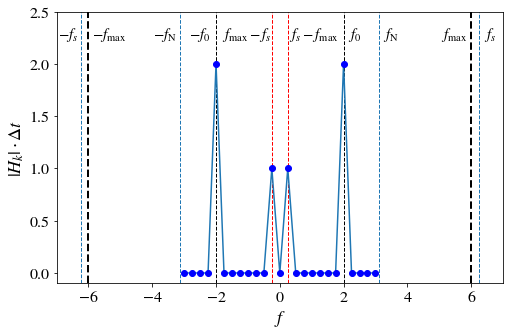

In [45]:
plt.plot(f_shift, np.abs(H_k_shift) *dt)
plt.plot(f_shift, np.abs(H_k_shift) *dt, 'bo')
plt.xlabel(r'$f$') ; plt.ylabel(r'$|H_k|\cdot \Delta t$')
ymax = 2.5
ymin = -0.1
yl = ymax-0.25
plt.axis([-7, 7, ymin, ymax])
plt.vlines(f0, ymin, ymax, linestyles = '--', linewidth=1.0)
plt.vlines(-f0, ymin, ymax, linestyles = '--', linewidth=1.0)
plt.vlines(fmax, ymin, ymax, linestyles = '--', linewidth=2.0)
plt.vlines(-fmax, ymin, ymax, linestyles = '--', linewidth=2.0)
plt.vlines(-1/(2*dt), ymin, ymax, linestyles = '--', linewidth=1.0, colors='tab:blue')
plt.vlines(1/(2*dt), ymin, ymax, linestyles = '--', linewidth=1.0, colors='tab:blue')
plt.vlines(-1/dt, ymin, ymax, linestyles = '--', linewidth=1.0, colors='tab:blue')
plt.vlines(1/dt, ymin, ymax, linestyles = '--', linewidth=1.0, colors='tab:blue')
plt.vlines(f_s-fmax, ymin, ymax, linestyles = '--', linewidth=1.0, colors='r')
plt.vlines(-(f_s-fmax), ymin, ymax, linestyles = '--', linewidth=1.0, colors='r')
plt.text(f0+0.15, yl, r'$f_0$', fontsize=15)
plt.text(-fmax+0.1, yl, r'$-f_{\rm max}$', fontsize=15)
plt.text(fmax-0.95, yl, r'$f_{\rm max}$', fontsize=15)
plt.text(-f0-0.85, yl, r'$-f_0$', fontsize=15)
plt.text((f_s-fmax)+0.05, yl, r'$f_s-f_{\rm max}$', fontsize=15)
plt.text(-(f_s-fmax)-1.55, yl, r'$f_{\rm max}-f_s$', fontsize=15)
plt.text(1/dt+0.15, yl, r'$f_s$', fontsize=15)
plt.text(-1/dt-0.7, yl, r'$-f_s$', fontsize=15)
plt.text(1/(2*dt)+0.1, yl, r'$f_{\rm N}$', fontsize=15)
plt.text(-1/(2*dt)-0.85, yl, r'$-f_{\rm N}$', fontsize=15)
plt.show()

In [46]:
display(f0, fmax, f_s, f_s/2, f_s - fmax)

2.0

6.0

6.25

3.125

0.25